Refer https://docs.pennylane.ai/en/stable/introduction/inspecting_circuits.html

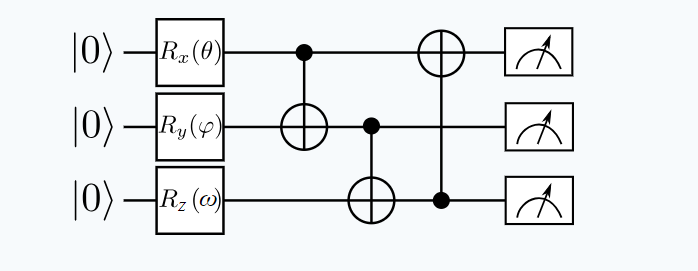

In [2]:
import numpy as np 
import random
from qiskit.quantum_info import Statevector
import pennylane as qml
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def my_circuit(theta, phi, omega):

    ##################
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)

    return qml.probs(wires=[0, 1, 2])


# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3


In [6]:
circuit = qml.QNode(my_circuit, dev)
specs_func = qml.specs(circuit)
specs_func(theta, phi,omega)

{'resources': Resources(num_wires=3, num_gates=6, gate_types=defaultdict(<class 'int'>, {'RX': 1, 'RY': 1, 'RZ': 1, 'CNOT': 3}), gate_sizes=defaultdict(<class 'int'>, {1: 3, 2: 3}), depth=4, shots=Shots(total_shots=None, shot_vector=())),
 'errors': {},
 'num_observables': 1,
 'num_diagonalizing_gates': 0,
 'num_trainable_params': 0,
 'num_device_wires': 3,
 'device_name': 'default.qubit',
 'expansion_strategy': 'gradient',
 'gradient_options': {},
 'interface': 'auto',
 'diff_method': 'best',
 'gradient_fn': 'backprop'}